In [54]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import datetime
import os

In [55]:
plt.rcParams['figure.figsize'] = (15, 10)

In [56]:
def path(*ds):
    return os.path.join(get_ipython().starting_dir, *ds) 

In [91]:
class event:
    def __init__(self, line):
        t, self.port, v = line.split()
        self.time = np.dot(
            [*map(float, t.split(':'))], 
            [60*60*1000,60*1000,1000,1]+[1]*(t.count(':')-3)
        ) / (60*60*1000)
        
        self.value = float(v)
    
    def __repr__(self):
        return "{} {} {}".format(self.time, self.port, self.value)

In [137]:
os.path.isfile(path('../simulation/eventGeneration/mergedData.ev'))
os.listdir()

FileNotFoundError: [Errno 2] No such file or directory: '/home/alfredo/proyectos/facultad/devs/devs-smart-grid/Notebooks/../../SED-TP1-informe/images/compWW.eps'

In [93]:
with open(path('../simulation/src/out/fbs'), 'r') as f:
    data = [*map(event, f.readlines())]

In [94]:
ports = {d.port for d in data}
ports

{'grid_demand', 'selling_energy'}

In [95]:
consumption = [(d.time, d.value if d.port == 'grid_demand' else -d.value) for d in data]

In [96]:
acc = [(0.0, 0.0)]
last_time = 0.0
last_value = 0.0
for t, v in consumption:
    acc.append((t, acc[-1][1] + (t-last_time)*last_value))
    last_time, last_value = t, v

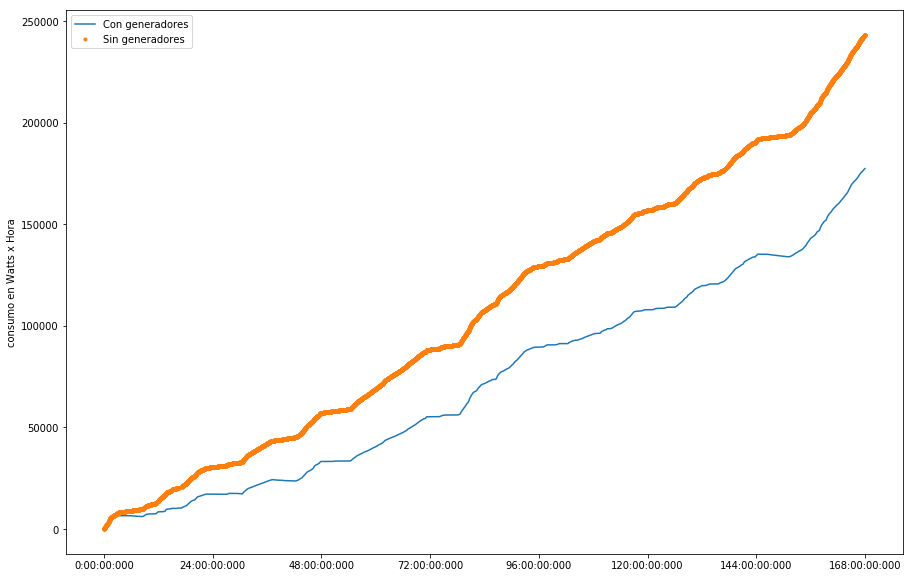

In [147]:
max_time = 24*7
xtick_step = 24
to_plot = [x for x in acc if x[0] <= max_time]
to_plot2 = [x for x in acc2 if x[0] <= max_time]
plt.plot(*zip(*to_plot), label='Con generadores')
plt.plot(*zip(*to_plot2), '.', label='Sin generadores')
xts = range(0, int(to_plot[-1][0])+1, xtick_step)
plt.xticks(xts, ["%d:00:00:000"%x for x in xts])
plt.legend()
plt.ylabel('consumo en Watts x Hora')
plt.savefig(path('../../SED-TP1-informe/images/compWW.eps'))
pass

In [86]:
with open(path('../simulation/eventGeneration/mergedData.ev'), 'r') as f:
    data2 = [*map(event, f.readlines())]

In [74]:
{d.port for d in data2}

{'power_consumption', 'radiation', 'wind_speed'}

In [121]:
consumption2 = [(d.time, d.value) for d in data2  if d.port == 'power_consumption' if d.time <=168]

In [122]:
acc2 = [(0.0, 0.0)]
last_time = 0.0
last_value = 0.0
for t, v in consumption2:
    acc2.append((t, acc2[-1][1] + (t-last_time)*last_value))
    last_time, last_value = t, v

In [120]:
acc2[10043], acc[-1]

((168.0, 243156.43333333332), (168.0, 177368.66060917091))

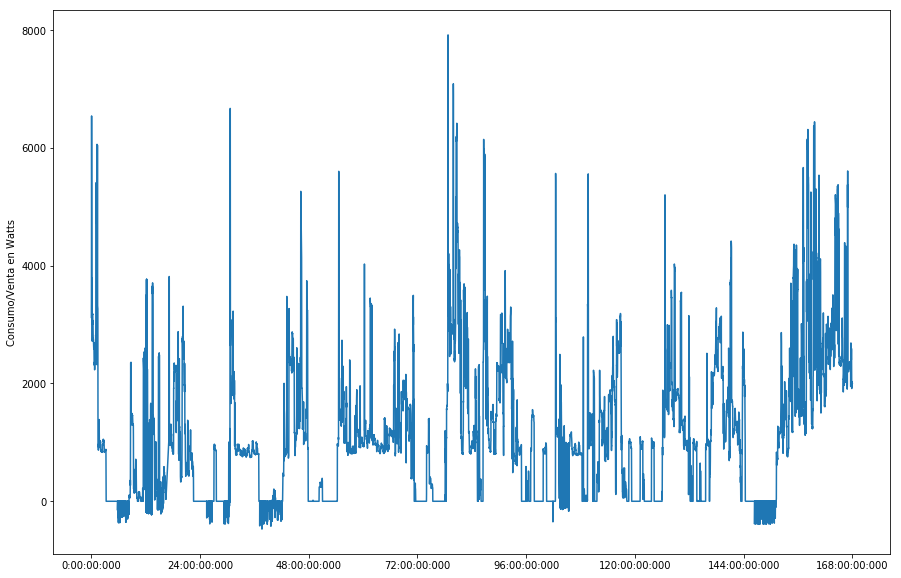

In [154]:
# plt.subplot(2,1,1)
# plt.plot(*zip(*consumption2))\
# plt.subplot(2,1,2)
plt.plot(*zip(*consumption))
xts = range(0, 175, 24)
plt.xticks(xts, ["%d:00:00:000"%x for x in xts])
plt.ylabel('Consumo/Venta en Watts')
plt.savefig(path('../../SED-TP1-informe/images/cons.eps'))